# Identifying Demographic With Least Food Access in FoodAPS datasets

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# using only access and househould datasets

In [53]:
# creating access dataframe from access csv file
access_df = pd.read_csv("C:/Users/New User/Desktop/USDA/CSV data files/faps_access_puf.csv")

In [54]:
# creating household dataframe from access csv file
household_df = pd.read_csv("C:/Users/New User/Desktop/USDA/CSV data files/faps_household_puf.csv")

# checking for correlation between variables in access_df

In [55]:
access_df.corr()

,hhnum,infousa_flag,snap1,snap2,snap3,snap4,snap5,snap6,snap7,snap8,...,nonff8,nearff_sic1,nearff_sic2,nearff_dist,nearnonff_sic1,nearnonff_sic2,nearnonff_dist,nearmcd_sic1,nearmcd_sic2,nearmcd_dist
hhnum,1.000000,0.004020,-0.000660,-0.000921,0.001604,-0.001212,-0.006937,0.007639,0.011501,0.011854,...,0.007941,-0.003434,0.003306,0.007022,0.002724,0.019276,0.004706,NaN,-0.006755,0.008384
infousa_flag,0.004020,1.000000,0.182165,0.165121,0.186170,0.219719,0.153549,0.125066,0.182121,0.361931,...,0.746424,0.035384,-0.031709,-0.139250,0.000297,0.016947,-0.145650,NaN,0.009662,-0.136205
snap1,-0.000660,0.182165,1.000000,0.911957,0.843265,0.811710,0.734416,0.704632,0.687015,0.616969,...,0.337414,-0.119460,0.107510,-0.179131,-0.031934,-0.026117,-0.220799,NaN,0.006501,-0.187251
snap2,-0.000921,0.165121,0.911957,1.000000,0.929726,0.896051,0.822222,0.801784,0.782179,0.694657,...,0.349812,-0.165721,0.147005,-0.192937,-0.032476,-0.018468,-0.228157,NaN,0.036306,-0.201613
snap3,0.001604,0.186170,0.843265,0.929726,1.000000,0.963920,0.883629,0.848488,0.819655,0.739211,...,0.390076,-0.208516,0.192817,-0.203236,-0.028846,-0.006159,-0.231149,NaN,0.049647,-0.212038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nearnonff_sic2,0.019276,0.016947,-0.026117,-0.018468,-0.006159,0.004565,0.023897,0.016007,0.006226,0.004192,...,0.018601,0.027101,-0.005840,-0.002571,0.204535,1.000000,-0.000973,NaN,-0.027560,-0.034689
nearnonff_dist,0.004706,-0.145650,-0.220799,-0.228157,-0.231149,-0.231066,-0.184551,-0.167365,-0.179712,-0.214941,...,-0.263013,0.072751,-0.054219,0.583036,-0.012168,-0.000973,1.000000,NaN,-0.044410,0.504279
nearmcd_sic1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nearmcd_sic2,-0.006755,0.009662,0.006501,0.036306,0.049647,0.038475,0.045146,0.033353,0.038396,0.023242,...,0.018476,0.027070,-0.038116,-0.033375,0.006985,-0.027560,-0.044410,NaN,1.000000,-0.042400


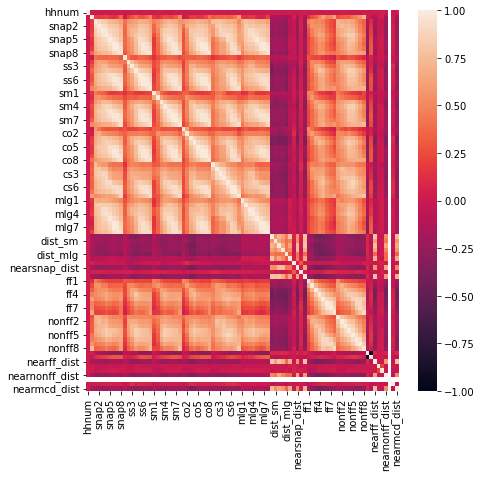

In [56]:
# visualizing variable relationships using heatmap
plt.figure(figsize = (7,7))
heatmap = sns.heatmap(access_df.corr(), vmin=-1, vmax=1)

In [57]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 87 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hhnum             4826 non-null   int64  
 1   infousa_flag      4826 non-null   int64  
 2   snap1             4826 non-null   int64  
 3   snap2             4826 non-null   int64  
 4   snap3             4826 non-null   int64  
 5   snap4             4826 non-null   int64  
 6   snap5             4826 non-null   int64  
 7   snap6             4826 non-null   int64  
 8   snap7             4826 non-null   int64  
 9   snap8             4826 non-null   int64  
 10  ss1               4826 non-null   int64  
 11  ss2               4826 non-null   int64  
 12  ss3               4826 non-null   int64  
 13  ss4               4826 non-null   int64  
 14  ss5               4826 non-null   int64  
 15  ss6               4826 non-null   int64  
 16  ss7               4826 non-null   int64  


In [60]:
household_df.describe()

,hhnum,initintrvmon,startmon,initfinaldays,initialdate_flag,startdate_edit,startlag,matchconsenthh,nonmetro,region,...,feedback2,feedback3,feedback4_1,feedback4_2,feedback4_3,feedback4_4,feedback4_5,feedback4_6,feedback4_7,feedback4_8
count,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.00000,4826.000000,4826.000000,...,4777.000000,4782.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000
mean,110044.741401,7.886241,7.911521,9.839619,0.003523,0.007874,1.094488,0.97472,0.088272,2.638210,...,-22.070756,-22.631744,-24.429289,-24.416109,-24.427824,-24.416946,-24.441004,-24.447699,-24.426569,-23.581799
std,5835.609881,2.172678,2.172996,5.801195,0.065878,0.088395,1.376103,0.15699,0.283719,1.003446,...,154.821887,154.644168,154.390018,154.392146,154.390255,154.392011,154.388126,154.387044,154.390457,154.524505
min,100012.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,104914.750000,6.000000,6.000000,8.000000,0.000000,0.000000,1.000000,1.00000,0.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,110106.000000,8.000000,8.000000,8.000000,0.000000,0.000000,1.000000,1.00000,0.000000,3.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,115150.500000,10.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.00000,0.000000,3.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,120080.000000,12.000000,12.000000,167.000000,2.000000,1.000000,53.000000,1.00000,1.000000,4.000000,...,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
acc_df = access_df[['hhnum', 'dist_sm']]
acc_df.head()

,hhnum,dist_sm
0,100012,0.33
1,100015,1.05
2,100024,4.77
3,100026,12.30
4,100028,1.17


In [81]:
hou_df = household_df[['targetgroup', 'whynotsupermkt2']]
hou_df.head()

,targetgroup,whynotsupermkt2
0,4,-996
1,2,-996
2,3,-996
3,2,-996
4,4,-996


In [84]:

acc_hou_df = pd.concat([acc_df, hou_df], axis=1)
acc_hou_df.head()

,hhnum,dist_sm,targetgroup,whynotsupermkt2
0,100012,0.33,4,-996
1,100015,1.05,2,-996
2,100024,4.77,3,-996
3,100026,12.30,2,-996
4,100028,1.17,4,-996


In [85]:
acc_hou_df.corr()

,hhnum,dist_sm,targetgroup,whynotsupermkt2
hhnum,1.000000,0.029808,0.017485,-0.002644
dist_sm,0.029808,1.000000,-0.039071,0.071088
targetgroup,0.017485,-0.039071,1.000000,-0.017381
whynotsupermkt2,-0.002644,0.071088,-0.017381,1.000000
